# In Class Project 3

## Intro

The purpose of this project is build statistical functions, import stock data from Yahoo finance, calculate percentage changes in stock prices, catalogue these into a dataframe, and create visualizations of the data.

### Functions

Functions are a bedrock of programming. Instead of recreating lines of code, a function allows us to callback to that code with a single line.

In [2]:
#Defining some arbitrary lists
lst1 = [1,2,3,4,5]
lst2 = [2,4,6,8,10]
lst3 = [1,2,3,4,5,6,7,8]
lst4 = [2,2,2,2,2,3,4,5,6]
total = 0
for val in lst1:
    #Find the summation of the values in each list, this will be used in our other functions
    total = total + val
    print("val:", val, "total:", total)

print("Total of Values from lst1:", total)
print("lst2:", lst2)

total = 0
for val in lst2:
    total = total + val
    print("val:", val, "total:", total)
print("total of values from lst2:", total)

val: 1 total: 1
val: 2 total: 3
val: 3 total: 6
val: 4 total: 10
val: 5 total: 15
Total of Values from lst1: 15
lst2: [2, 4, 6, 8, 10]
val: 2 total: 2
val: 4 total: 6
val: 6 total: 12
val: 8 total: 20
val: 10 total: 30
total of values from lst2: 30


### Mean Average

In [4]:
def total(list_obj):
    total = 0
    n = len(list_obj) #N
    #for i in range(n):
    #    val = list_obj[i]
    #    total += val
    for val in list_obj:
        #total += val
        total = total + val
    # return outputs whatever value or variable is after return
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

In [6]:
mean1 = mean(lst1)
mean2 = mean(lst2)
mean3 = mean(lst3)

print("mean of list 1:", mean1)
print("mean of list 2:", mean2)
print("mean of list 3:", mean3)

mean of list 1: 3.0
mean of list 2: 6.0
mean of list 3: 4.5


In [8]:
def median(list_obj):
    n = len(list_obj)
    # order list by value from smallest to greatest
    list_obj = sorted(list_obj)
    # If the number of objects in the list not even
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # take the average of the two middle numbers
#        median_ = mean([list_obj[lower_middle_index],list_obj[upper_middle_index]])
        median_ = mean(list_obj[lower_middle_index:upper_middle_index + 1])
    
    return median_

median1 = median(lst1)
median2 = median(lst2)
median3 = median(lst3)

print("Median of List 1:", median1)
print("Median of List 2:", median2)
print("Median of List 3:", median3)

Median of List 1: 3
Median of List 2: 6
Median of List 3: 4.5


### Mode

In [12]:
def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

mode1 = mode(lst1)
mode2 = mode(lst2)
mode3 = mode(lst3)
mode4 = mode(lst4)

print("Mode of List 1", mode1)
print("Mode of List 2", mode2)
print("Mode of List 3", mode3)
print("Mode of List 4", mode4)

Mode of List 1 [1, 2, 3, 4, 5]
Mode of List 2 [2, 4, 6, 8, 10]
Mode of List 3 [1, 2, 3, 4, 5, 6, 7, 8]
Mode of List 4 [2]


### Variance

Variance is the second moment.

In [14]:
def variance(list_obj, sample = False):
    # Sample = False assumes list is entire population. This would not be the case if we were running OLS, but in this 
    # Case, working with financial data, this assumption is valid.
    list_mean = mean(list_obj) #Going back to a function we defined earlier
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2 #The Squared Difference between our actual observation and the mean
    if sample == False:
        variance_ = sum_sq_diff / n
    else: #This would give the sample variance
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

var1 = variance(lst1)
var2 = variance(lst2)
var3 = variance(lst3)

print("Variance of List1:", var1)
print("Variance of List2:", var2)
print("Variance of List3:", var3)

Variance of List1: 2.0
Variance of List2: 8.0
Variance of List3: 5.25


### Standard Deviation

Standard deviation is the square root of the variance.

In [18]:
def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

sd1 = SD(lst1)
sd2 = SD(lst2)
sd3 = SD(lst3)

print("Standard Deviation of List 1:", sd1)
print("Standard Deviation of List 2:", sd2)
print("Standard Deviation of List 3:", sd3)

Standard Deviation of List 1: 1.4142135623730951
Standard Deviation of List 2: 2.8284271247461903
Standard Deviation of List 3: 2.29128784747792


# Correlation

Covariance is similar to covariance, but normalizes that statistic so that it only takes values from -1 to 1

In [19]:
def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    
    return corr

corr12 = correlation(lst1, lst2)

print("Correlation between List 1 and List 2:", corr12)

Correlation between List 1 and List 2: 0.9999999999999998


### Skewness and Kurtosis

Skewness and Kurtosis are our third and fourth moments. Skewness is a measure of the peakedness of the data, and kurtosis measures the "fatness" of the tails.

In [22]:
def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / (n *  SD_ ** 3) if not sample else n * skew / ((n-1) * (n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(lst, sample = False):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

skew1 = skewness(lst1)
skew2 = skewness(lst2)
skew3 = skewness(lst3)
kurt1 = kurtosis(lst1)
kurt2 = kurtosis(lst2)
kurt3 = kurtosis(lst3)

print("Skewness of List 1", skew1)
print("Skewness of List 2", skew2)
print("Skewness of List 3", skew3)
print("Kurtosis of List 1:", kurt1)
print("Kurtosis of List 2:", kurt2)
print("Kurtosis of List 3:", kurt3)

Skewness of List 1 0.5706462828136141
Skewness of List 2 0.566310372668443
Skewness of List 3 0.44721916373978315
Kurtosis of List 1: 1.6999999999999997
Kurtosis of List 2: 1.6999999999999997
Kurtosis of List 3: 1.761904761904762


## Application: Creating a Dataframe and Visualizations

First, we create a function that will be able to create a Dataframe to neatly save our statistics.

In [23]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df} #Each 
    # column data is val 
    #     for df.items()
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val), 3)
        dct[key]["kurtosis"] = round(kurtosis(val), 3)
    stats_df = pd.DataFrame(dct)
    return stats_df

Having successfully installed Pandas Datareader in our Powershell, using the command pip install pandas-datareader, we proceed to import financial data for 4 stocks. In this case, we've chosen Microsoft, Apple, Facebook, and Tesla.

In [32]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1, 1) #year, month, day
end = datetime.datetime.today()

data_dict = {} #Creating an empty dictionary to fill
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for name in stocks:
    # web.DataReader(stockname, source, start_date, end_date)
    data_dict[name] = web.DataReader(name, "yahoo", start, end)

data_dict["MSFT"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
...,...,...,...,...,...,...
2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,202.539993
2020-09-22,208.100006,202.080002,205.059998,207.419998,33517100.0,207.419998
2020-09-23,208.100006,200.029999,207.899994,200.589996,30803800.0,200.589996


In [33]:
data_dict["AAPL"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998
2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,107.120003


In [35]:
data_dict["FB"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2020-09-21,249.949997,244.130005,247.539993,248.149994,24709400,248.149994
2020-09-22,255.320007,248.220001,253.309998,254.750000,30293100,254.750000
2020-09-23,257.989990,248.149994,255.259995,249.020004,19641300,249.020004


In [37]:
data_dict["TSLA"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2020-09-21,455.679993,407.070007,453.130005,449.390015,109476800.0,449.390015
2020-09-22,437.760010,417.600006,429.600006,424.230011,79580800.0,424.230011
2020-09-23,412.149994,375.880005,405.160004,380.359985,95074200.0,380.359985


Now let's save our closing price stock data for the four stocks in a Dataframe.

In [41]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1) #Lists of close data
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765715,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2020-09-21,202.539993,110.080002,248.149994,449.390015
2020-09-22,207.419998,111.809998,254.750000,424.230011
2020-09-23,200.589996,107.120003,249.020004,380.359985


We now can plot this data visually.

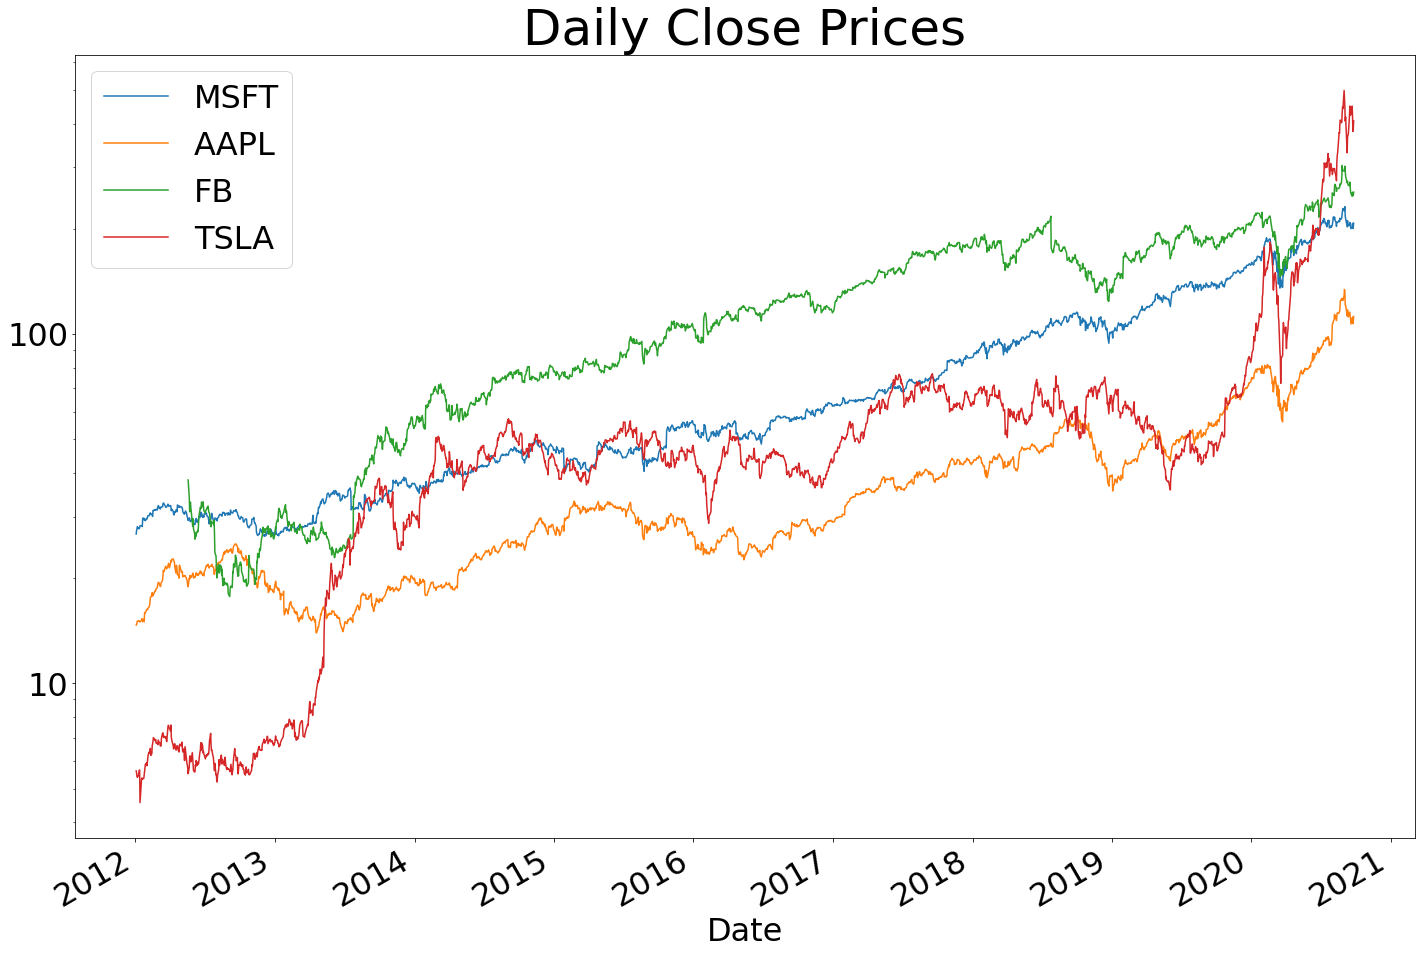

In [43]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 32}) #Set Font Size

fig, ax = plt.subplots(figsize = (24, 16)) #Create 
close_data.plot.line(ax = ax, legend = True)

ax.set_yscale("log") #Set our scale as log. Log changes are percentage changes

#For cleanliness, we set 10^2 and 10^3 as their actual values
y_vals = ax.get_yticks()
reformat_values = [int(y) if y >= 1 else round(y,1) for y in y_vals]
# set axis labels with reformat_values instead of existing values
ax.set_yticklabels(reformat_values)

#reformat_x_values = close_data.index
#ax.set_xticklabels(close_data.index)
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%M-%Y"))

# set title
plt.title("Daily Close Prices", fontsize = 50)
# show visualization
plt.show()
# remove fig, ax by closing
plt.close()

In [45]:
# In finance, we're general more interested in percentage in price rather than the change in level.
# pct_change give percent as decimal.
price_change_data = close_data.pct_change() * 100
price_change_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537415,NaN,-1.317670
2012-01-05,1.021900,1.110194,NaN,-2.129196
2012-01-06,1.553469,1.045381,NaN,-0.774333
2012-01-09,-1.316261,-0.158618,NaN,1.263468
...,...,...,...,...
2020-09-21,1.072905,3.032577,-1.734449,1.637458
2020-09-22,2.409403,1.571580,2.659684,-5.598701
2020-09-23,-3.292837,-4.194611,-2.249262,-10.341094


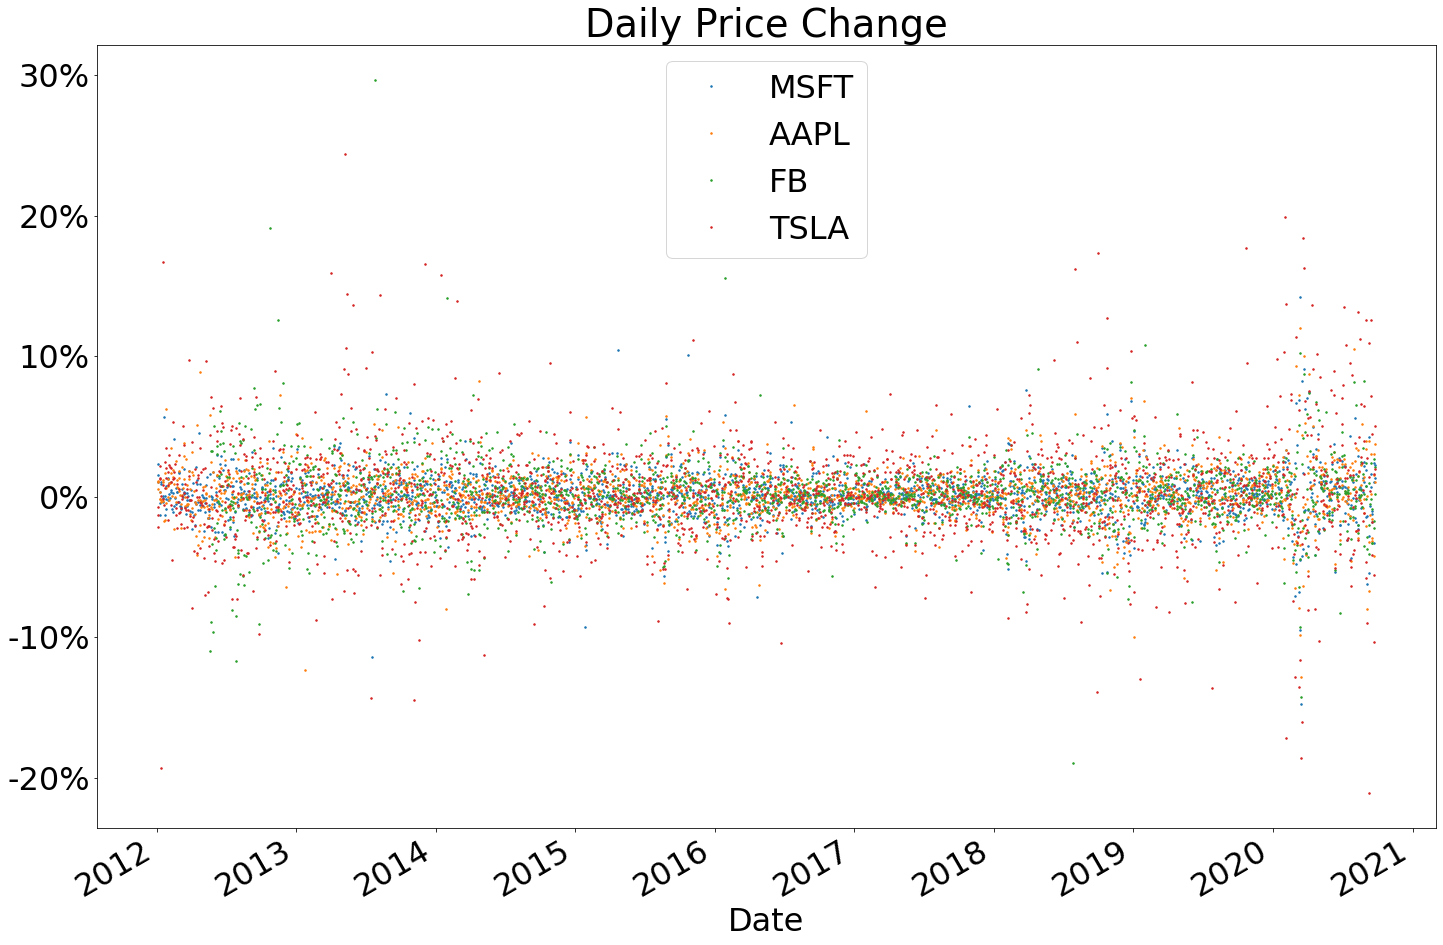

In [47]:
plt.rcParams.update({"font.size": 32})
# make a new figure with plt.subplots()
fig, ax = plt.subplots(figsize = (24, 16))
# for each key in price_change_data, plot using "." as the marker
for key in price_change_data:
    # ls = "" tells the program not to plot a line, only plot points
    price_change_data[key].plot.line(marker = ".",markersize = 3, ls = "", ax = ax)
#plt.legend(loc = "upper left") or plt.legend(loc = "upper right")
plt.legend()
plt.title("Daily Price Change")
# access y_vals, transform to string with %
y_vals = ax.get_yticks()
reformat_y_vals =[str(int(y)) + "%" for y in y_vals]
ax.set_yticklabels(reformat_y_vals)
plt.show()
plt.close()

In [49]:
stats_df = gather_statistics(price_change_data)
stats_df

,MSFT,AAPL,FB,TSLA
mean,0.107,0.109,0.118,0.256
median,0.069,0.089,0.107,0.122
variance,2.674,3.233,5.558,12.339
S.D.,1.635,1.798,2.358,3.513
skewness,0.001,0.004,0.000,0.001
kurtosis,14.212,10.014,22.309,9.490


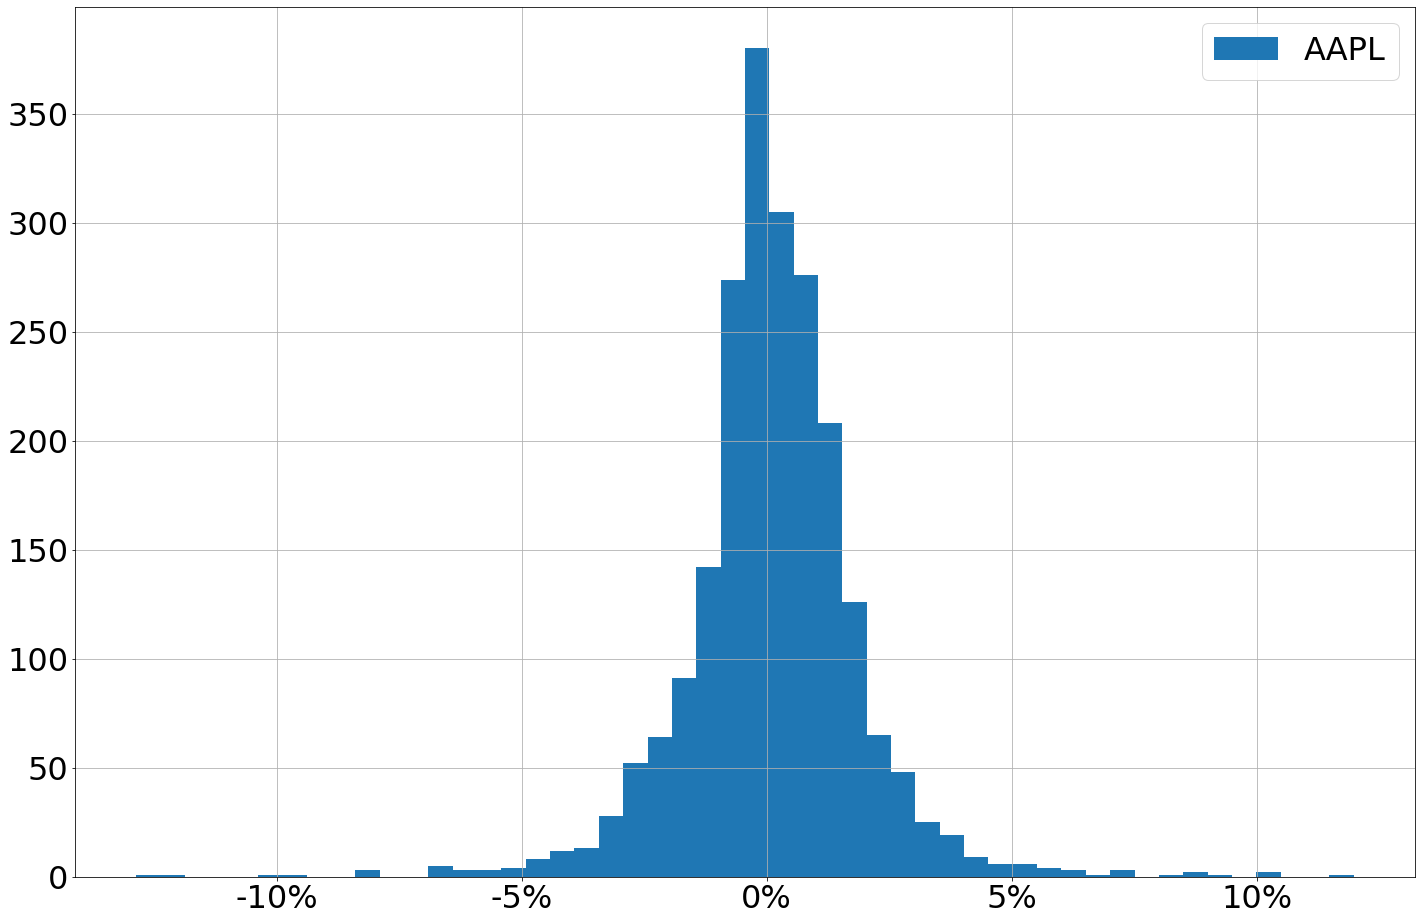

In [51]:
fig, ax = plt.subplots(figsize = (24, 16)).
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
plt.legend()

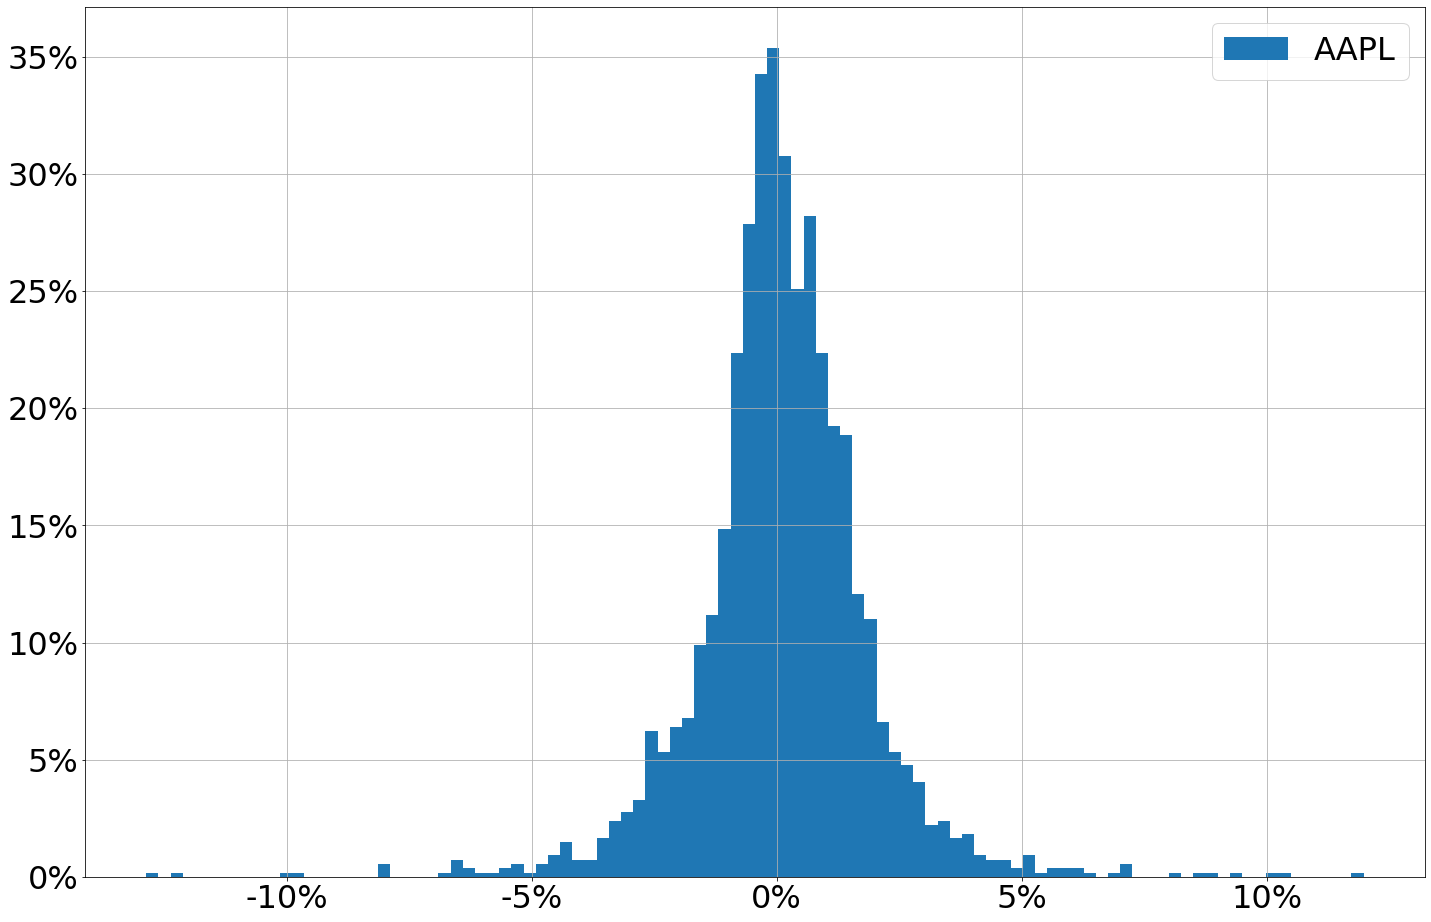

In [53]:
fig, ax = plt.subplots(figsize = (24, 16))
# use df.hist() to create histogram
# bins identifies the number of discrete divisions in the data vis.
price_change_data["AAPL"].hist(bins = 100, label = "AAPL",
                              density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
# set veritcal axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels(str(int(y*100)) + "%" for y in y_vals)
plt.legend()

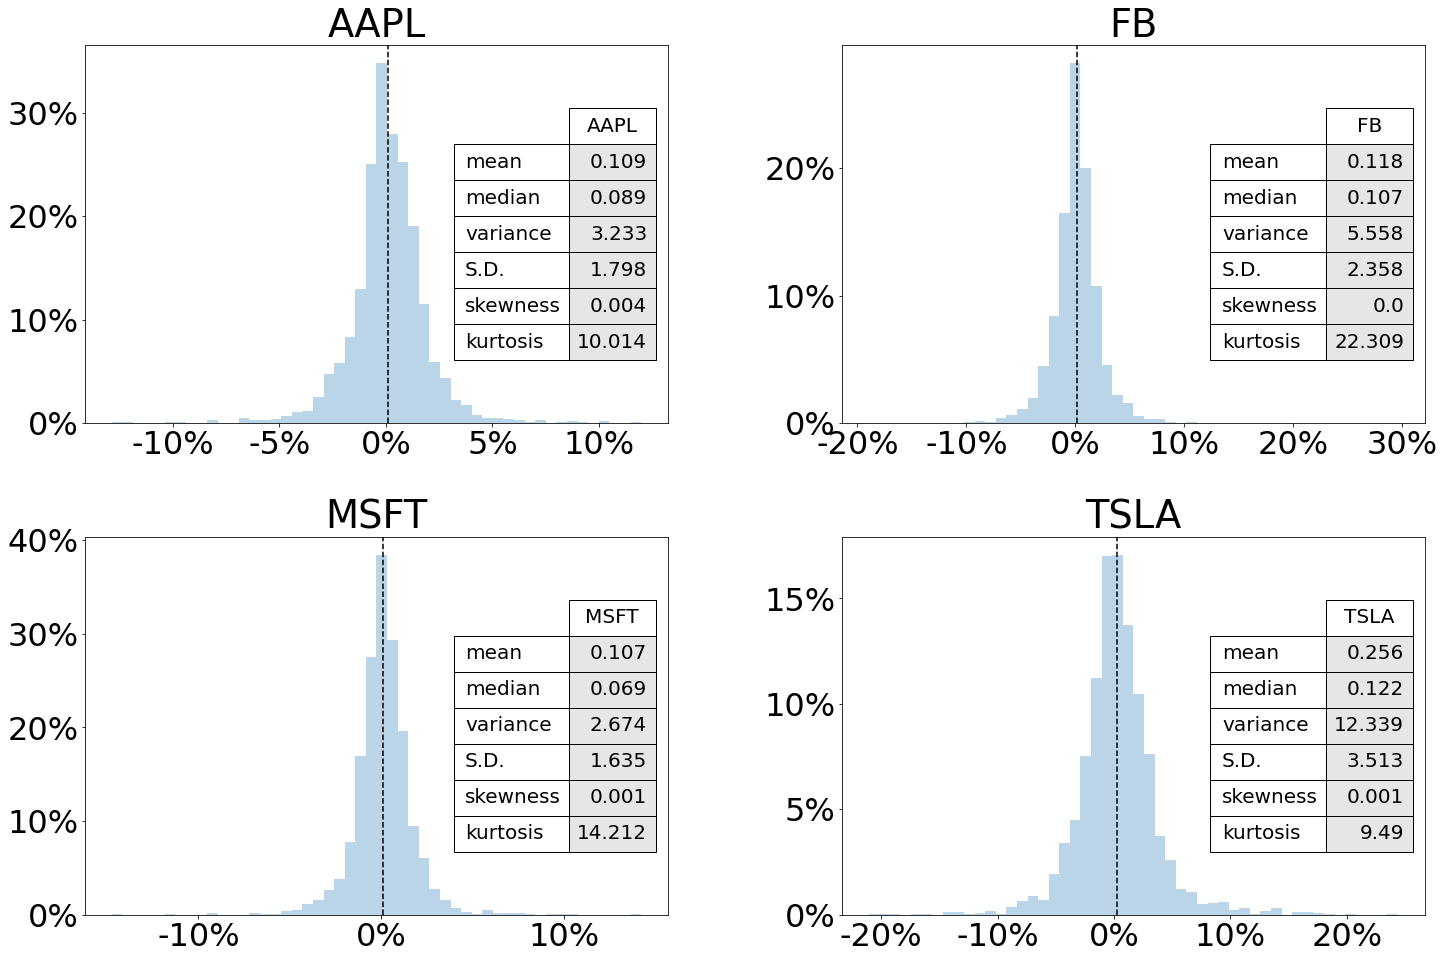

In [55]:
from pandas.plotting import table

# adding (2,2, . . .) in subplots makes ax a 2x2 list
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50, alpha = .3, ax = ax,
                       label = price_change_data.keys(),
                       density = True)


for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        # stock title
        stock = a.get_title()
        summ_data = stats_df[stock]
        #make summary statistics
        stats = table(a, summ_data, 
                      colWidths=[.1],
                      # make cells grey
                      # this function is calling color in
                      # terms of (r, g, b)
                      cellColours=[[(.9, .9, .9)]]*6,
                     loc ="center right")
        # size of table
        stats.scale(1.5, 3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        #average has verticle line
        a.axvline(x = summ_data.loc["mean"], ls="--", 
                  color = "k")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)

plt.show()
plt.close()

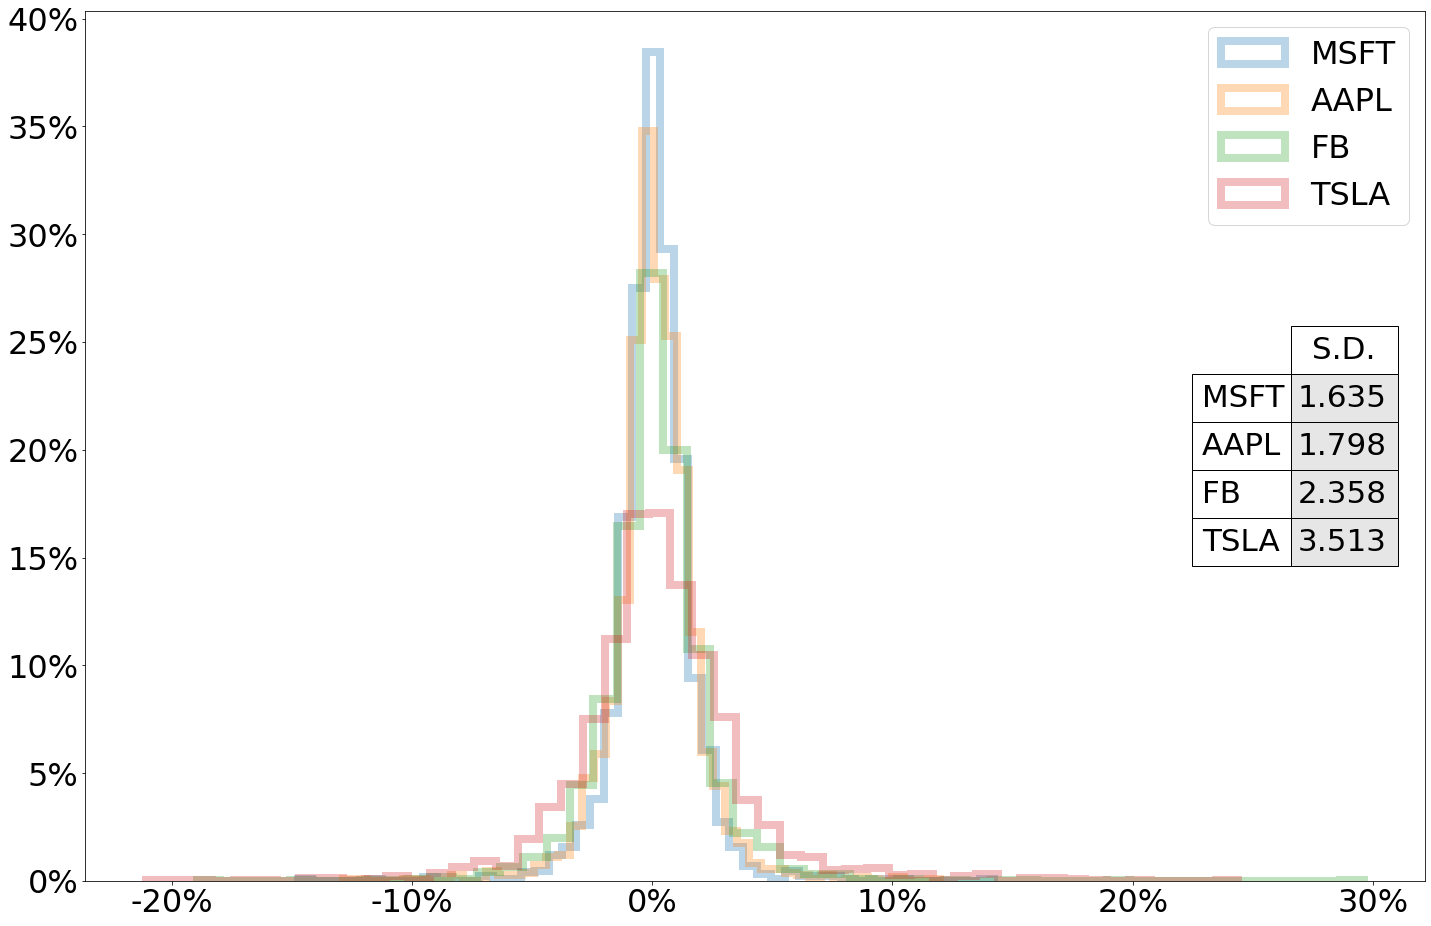

In [57]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins=50, histtype = "step", 
                                 alpha = .3, label = key, linewidth = 8,
                                density = True)
# horizontal values as percent
x_vals = ax.get_xticks()
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)
# vert v as percent
y_vals = ax.get_yticks()
y_vals = [str(int(y * 100))+ "%" for y in y_vals]
ax.set_yticklabels(y_vals)
# Table with SD
stats = table(ax, stats_df.loc["S.D."], colWidths=[.1],
             cellColours=[[(.9, .9, .9)]]*4, loc = "center right")
stats.scale(.8, 4)
ax.grid(False)
# legend draws from label values passed in df.hist()
plt.legend(loc = "upper right")